#Environment setup

##Initial imports

In [ ]:
import pandas as pd
import numpy as np
from scipy.io import arff
import os
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Constants configurations

In [ ]:
path = '/tmp/extracted/'
drive_path = '/content/drive/MyDrive/Deep/Ass4/'


#Load and Preprocess

##Diabetes Dataset

In [ ]:
diabetes_data = arff.loadarff(drive_path+"diabetes.arff")
diabetes_df = pd.DataFrame(diabetes_data[0])
del diabetes_data
diabetes_df["class"].replace(b'tested_positive', 1,inplace=True)
diabetes_df["class"].replace(b'tested_negative', 0, inplace=True)
diabetes_df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [ ]:
diabetes_min = diabetes_df.min()
diabetes_max = diabetes_df.max()
normalized_diabetes_df=(diabetes_df-diabetes_min)/(diabetes_max-diabetes_min)
diabetes_binary_col_dict = {"class": 8}
normalized_diabetes_df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


###Final Preprocess

In [ ]:
diabetes_real_data = normalized_diabetes_df.to_numpy()
diabetes_real_data.shape

(768, 9)

##German_credit Dataset

In [ ]:
ger_cred_data = arff.loadarff(drive_path+"german_credit.arff")
ger_cred_df = pd.DataFrame(ger_cred_data[0])
del ger_cred_data
ger_cred_df['21'].replace(b'1', 0,inplace=True)
ger_cred_df['21'].replace(b'2', 1,inplace=True)
ger_cred_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',4.0,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',0
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',2.0,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',1
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',3.0,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',0
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',4.0,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',0
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',4.0,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',4.0,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',0
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',4.0,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',0
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',4.0,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',0
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',4.0,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',1


In [ ]:
categorical_columns_names = []
numerical_columns_names = []
for column_name in ger_cred_df.columns[:-1]:
  if ger_cred_df[column_name].dtype == 'float64':
    numerical_columns_names.append(column_name)
  else:
    categorical_columns_names.append(column_name)

print(f"categorical_columns_names: {categorical_columns_names}")
print(f"numerical_columns_names: {numerical_columns_names}")

categorical_columns_names: ['1', '3', '4', '6', '7', '9', '10', '12', '14', '15', '17', '19', '20']
numerical_columns_names: ['2', '5', '8', '11', '13', '16', '18']


In [ ]:
def normalize_ger_cred(converted_dataframe): 
  #Numerical values are normalized
  ger_cred_min = converted_dataframe[numerical_columns_names].min()
  ger_cred_max = converted_dataframe[numerical_columns_names].max()
  conv_normalized_ger_cred_df = pd.DataFrame()

  for numeric_column_name in numerical_columns_names:
    normalized_column=(converted_dataframe[numeric_column_name]-ger_cred_min[numeric_column_name])/(ger_cred_max[numeric_column_name]-ger_cred_min[numeric_column_name])
    conv_normalized_ger_cred_df[numeric_column_name] = normalized_column

  conv_normalized_ger_cred_df_no_dummies = conv_normalized_ger_cred_df
  #Categorical values are one=hot encoded usin dummy variables
  # dicti = {"A": (1,2,3), "B":(4,5)}
  ger_cred_cat_col_dict = {}
  for categorical_column_name in categorical_columns_names:
    start = len(normalized_ger_cred_df.columns)
    conv_normalized_ger_cred_df = pd.concat((conv_normalized_ger_cred_df, pd.get_dummies(converted_dataframe[categorical_column_name])), axis=1)
    conv_normalized_ger_cred_df_no_dummies = pd.concat((conv_normalized_ger_cred_df_no_dummies, converted_dataframe[categorical_column_name]), axis=1)
    end = len(conv_normalized_ger_cred_df.columns)
    ger_cred_cat_col_dict[categorical_column_name] = list(range(start,end))


  ger_cred_binary_col_dict = {"class": 61}
  #concatinating the class column
  conv_normalized_ger_cred_df["class"] = converted_dataframe["21"]
  conv_normalized_ger_cred_df_no_dummies["class"] = converted_dataframe["21"]

  return conv_normalized_ger_cred_df, ger_cred_cat_col_dict


In [ ]:
normalized_ger_cred_df, ger_cred_cat_col_dict = normalize_ger_cred(ger_cred_df)
normalized_ger_cred_df

In [ ]:
normalized_ger_cred_df_no_dummies

,2,5,8,11,13,16,18,1,3,4,6,7,9,10,12,14,15,17,19,20,class
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,b'A11',b'A34',b'A43',b'A65',b'A75',b'A93',b'A101',b'A121',b'A143',b'A152',b'A173',b'A192',b'A201',0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,b'A12',b'A32',b'A43',b'A61',b'A73',b'A92',b'A101',b'A121',b'A143',b'A152',b'A173',b'A191',b'A201',1
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,b'A14',b'A34',b'A46',b'A61',b'A74',b'A93',b'A101',b'A121',b'A143',b'A152',b'A172',b'A191',b'A201',0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,b'A11',b'A32',b'A42',b'A61',b'A74',b'A93',b'A103',b'A122',b'A143',b'A153',b'A173',b'A191',b'A201',0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,b'A11',b'A33',b'A40',b'A61',b'A73',b'A93',b'A101',b'A124',b'A143',b'A153',b'A173',b'A191',b'A201',1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0,b'A14',b'A32',b'A42',b'A61',b'A74',b'A92',b'A101',b'A121',b'A143',b'A152',b'A172',b'A191',b'A201',0
996,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0,b'A11',b'A32',b'A41',b'A61',b'A73',b'A91',b'A101',b'A122',b'A143',b'A152',b'A174',b'A192',b'A201',0
997,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0,b'A14',b'A32',b'A43',b'A61',b'A75',b'A93',b'A101',b'A123',b'A143',b'A152',b'A173',b'A191',b'A201',0
998,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0,b'A11',b'A32',b'A43',b'A61',b'A73',b'A93',b'A101',b'A124',b'A143',b'A153',b'A173',b'A192',b'A201',1


###Final Preprocess

In [ ]:
ger_cred_real_data = normalized_ger_cred_df.to_numpy()
ger_cred_real_data.shape

(1000, 62)

##Categorical one-hot invertion

In [ ]:
# def convert_gen_pred_single_vec_to_one_hot(vector, cat_feat_dict):
#   """
#   Converts each categorical feature's numerical feature to one-hot using the given columns dictionary  
#   columns_dictionary: {<categorical feature column name>: [list of feature's numerical indexes]}
#   """
#   for feature_name, feature_indexes in cat_feat_dict.items():
#     print(feature_indexes)
#     feature_values = vector[feature_indexes[0]:feature_indexes[-1]+1]
#     print(feature_values)
#     max_val_index = np.argmax(feature_values)
#     feature_values = [1 if index==max_val_index else 0 for index, x in enumerate(feature_values)]
#     vector[feature_indexes[0]:feature_indexes[-1]+1] = feature_values 

#   return vector
  
def convert_gen_pred_to_one_hot(vectors, cat_feat_dict):
  """
  Converts each categorical feature's numerical feature to one-hot using the given columns dictionary  
  columns_dictionary: {<categorical feature column name>: [list of feature's numerical indexes]}
  """
  for feature_name, feature_indexes in cat_feat_dict.items():
    features_values = vectors[:, feature_indexes[0]:feature_indexes[-1]+1]
    max_val_indexes = np.argmax(features_values,axis=1)
    for samp_index, max_val_index in enumerate(max_val_indexes):
      features_values[samp_index] = [1 if index==max_val_index else 0 for index, x in enumerate(features_values[samp_index])]

    vectors[:,feature_indexes[0]:feature_indexes[-1]+1] = features_values 
  return vectors

def convert_to_binary_feat(vectors, binary_feat_dict):
  for feature_name, feature_index in binary_feat_dict.items():
    features_values = vectors[:, feature_index]
    features_values = [1 if samp_val>=0.5 else 0 for samp_val in features_values]

    vectors[:,feature_index] = features_values 
  return vectors

def invert_categorical_features(vectors, cat_feat_dict, binary_feat_dict):
  if cat_feat_dict != None: 
    vectors = convert_gen_pred_to_one_hot(vectors=vectors, cat_feat_dict=cat_feat_dict)
  if binary_feat_dict != None:
    vectors = convert_to_binary_feat(vectors=vectors, binary_feat_dict=binary_feat_dict)
  return vectors

# dicti = {"A": (1,2,3), "B":(4,5)}
# vec_a = [99,0.97,0.5,0.6,0.5,0.6]
# vec_b = [98,0.97,0.99,0.6,0.7,0.5]
# batch = np.vstack((vec_a, vec_b))
# print(batch)
# convert_gen_pred_to_one_hot(batch, dicti)



#GAN Model Construction

##Imports

In [ ]:
from keras.layers import Input, Embedding, Dense, Dropout, BatchNormalization, LSTM, Activation, Reshape, Concatenate,Flatten, TimeDistributed
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
import datetime


## GAN Class


In [ ]:
%load_ext tensorboard
logs_dir = drive_path + "/fit"
tensor_board_callback = TensorBoard(log_dir=logs_dir+"/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1)

In [ ]:
# ==============================================================================
# source: https://github.com/eriklindernoren/Keras-GAN/blob/master/dcgan/dcgan.py


from keras.layers import Input, Dense
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
class GAN():
    def __init__(self, columns_count, learning_rate=0.001):
        # Input shape
        self.columns_count = columns_count
        self.latent_dim = 100 ##noise dim

        optimizer = Adam(learning_rate=learning_rate)
        gen_opt = Adam(learning_rate=learning_rate)
        if columns_count > 30:
          gen_opt = Adam(learning_rate=learning_rate*0.01)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        #loss_d = - log(pred_d(x)) - log(1-pred_d(g(z)))
        #loss_g = - log(pred_d(g(z)))

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates samples
        z = Input(shape=(self.latent_dim,))
        g_z = self.generator(z)

        self.discriminator.trainable = False

        # The discriminator takes generated samples as input and determines validity
        pred_d_g_z = self.discriminator(g_z)

        # The combined model  (stacked generator and discriminator)
        self.combined = Model(z, pred_d_g_z)
        self.combined.compile(loss='binary_crossentropy', optimizer=gen_opt)

        
    def build_generator(self):

        model = Sequential(name = "generator")

        model.add(Dense(self.latent_dim, activation="relu", input_dim=self.latent_dim))
        # model.add(Dense(self.latent_dim*8, activation="relu"))
        # model.add(Dense(self.latent_dim*4, activation="relu"))
        if self.columns_count < 30:
          model.add(Dense(self.latent_dim, activation="relu"))
          model.add(Dense(self.latent_dim, activation="relu"))
          model.add(Dense(self.columns_count, activation="relu"))
          model.add(Dense(self.columns_count, activation="relu"))
        else:
          model.add(Dense(512, activation="relu"))
          model.add(BatchNormalization())
          # model.add(Dropout(0.1)()
          model.add(Dense(256, activation="relu"))
          model.add(BatchNormalization())
          # model.add(Dropout(0.1))
          model.add(Dense(256, activation="relu"))
          model.add(BatchNormalization())
          model.add(Dense(128, activation="relu"))
          model.add(BatchNormalization())
          model.add(Dense(128, activation="relu"))
          model.add(BatchNormalization())
          # model.add(Dense(128, activation="relu"))
          # model.add(BatchNormalization())
          

        model.add(Dense(self.columns_count, activation="relu"))
        model.add(Dense(self.columns_count, activation="relu"))
        model.add(Dense(self.columns_count, activation="sigmoid"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        g_z = model(noise)

        return Model(noise, g_z)

    def build_discriminator(self):

        model = Sequential(name = "discriminator")

        model.add(Dense(self.columns_count, activation="relu", input_dim=self.columns_count))
        # if self.columns_count > 30:
        #   model.add(Dense(self.columns_count, activation="relu", input_dim=self.columns_count))
        #   model.add(Dense(self.columns_count, activation="relu", input_dim=self.columns_count))
        # else:
        # model.add(Dense(30, activation="relu", input_dim=self.columns_count))
        # model.add(Dense(30, activation="relu", input_dim=self.columns_count))
        # model.add(Dense(30, activation="relu", input_dim=self.columns_count))
        # if self.columns_count/2 > 10:
        #   model.add(Dense(self.columns_count/2, activation="relu", input_dim=self.columns_count))
        #   model.add(Dense(self.columns_count/2, activation="relu", input_dim=self.columns_count))
        # else:
        # model.add(Dense(20, activation="relu", input_dim=self.columns_count))
        if self.columns_count < 30:
          model.add(Dense(15, activation="relu", input_dim=self.columns_count))
          model.add(Dense(10, activation="relu", input_dim=self.columns_count))
          model.add(Dense(10, activation="relu", input_dim=self.columns_count))
          model.add(Dense(10, activation="relu", input_dim=self.columns_count))
        else:
          model.add(Dense(self.columns_count, activation="relu", input_dim=self.columns_count))
          model.add(Dense(15, activation="relu", input_dim=self.columns_count))
          model.add(Dropout(0.1))
          model.add(Dense(15, activation="relu", input_dim=self.columns_count))
          model.add(Dropout(0.1))
          model.add(Dense(15, activation="relu", input_dim=self.columns_count))
          model.add(Dropout(0.1))
          model.add(Dense(15, activation="relu", input_dim=self.columns_count))
          model.add(Dropout(0.1))
          model.add(Dense(15, activation="relu", input_dim=self.columns_count))
          model.add(Dropout(0.1))
          model.add(Dense(15, activation="relu", input_dim=self.columns_count))
          # model.add(Dropout(0.1))
          model.add(Dense(15, activation="relu", input_dim=self.columns_count))
        
        
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        sample = Input(shape=self.columns_count)
        validity = model(sample)

        return Model(sample, validity)

    def save_model(self, model, model_type):
        if model_type == "discriminator":
            model.save('pre-trained_models/DCGAN26/discriminator')
        elif model_type == "generator":
            model.save('pre-trained_models/DCGAN26/generator')

    def load_pretrained_modles(self):
        self.discriminator = Model.load_model('pre-trained_models/DCGAN26/discriminator')
        self.generator = Model.load_model('pre-trained_models/DCGAN26/generator')

    def train(self, real_data, epochs, batch_size=32, discriminator_loss_steps = 10,save_interval=50 ,categorical_column_dict=None, binary_column_dict=None):

        # # Load the dataset
        # (X_train, _), (_, _) = mnist.load_data()

        # # Rescale -1 to 1
        # X_train = X_train / 127.5 - 1.
        # X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths - real classified as ones and generated as zeros
        valid = np.ones((batch_size, 1)) #labels for the real data samples
        fake = np.zeros((batch_size, 1)) #labels for the generated data samples


        history = {
            "d_accuracy": [],
            "d_loss": [],
            "g_loss": []
        }
        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select random samples
            batch_real_samples = real_data[np.random.randint(0, real_data.shape[0], batch_size)]

            # Sample noise from normal distribution and generate a batch of new samples
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            batch_gen_samples = self.generator.predict(noise)
            batch_gen_samples = invert_categorical_features(batch_gen_samples, categorical_column_dict, binary_column_dict)

            # Train the discriminator
            if epoch%discriminator_loss_steps==0:
              d_loss_real = self.discriminator.train_on_batch(batch_real_samples, valid)
              d_loss_fake = self.discriminator.train_on_batch(batch_gen_samples, fake)
              d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake generated samples as real)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
            
            history["d_accuracy"].append(d_loss[1])
            history["d_loss"].append(d_loss[0])
            history["g_loss"].append(g_loss)

            # If at save interval => save generated image samples
            # if epoch % save_interval == 0:
                # self.save_imgs(epoch)
                # self.save_model(self.discriminator, "discriminator")
                # self.save_model(self.generator, "generator")
        return history
    def generate_samples(self, num_of_samples=10, categorical_column_dict=None, binary_column_dict=None):
        noise = np.random.normal(0, 1, (num_of_samples, self.latent_dim))
        gen_samples = self.generator.predict(noise)
        return invert_categorical_features(gen_samples, categorical_column_dict, binary_column_dict)
        

    def discriminate(self, samples):
      return self.discriminator.predict(samples)

#Model creation

##Diabetes Model

In [ ]:
diabetes_gan = GAN(len(normalized_diabetes_df.columns),learning_rate=0.00005)
diabetes_gan.combined.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 15)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 631
Trainable params: 631
Non-trainable params: 0
_______________________________________________________

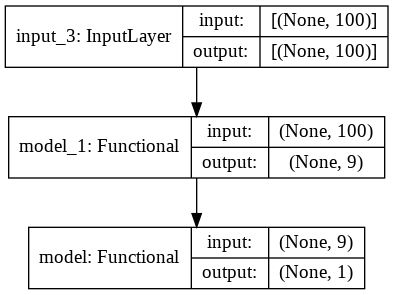

In [ ]:
plot_model(diabetes_gan.combined, show_shapes=True)

##German_credit Model

In [ ]:
ger_cred_gan = GAN(len(normalized_ger_cred_df.columns),learning_rate=0.00001)
ger_cred_gan.combined.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 62)                3906      
_________________________________________________________________
dense_15 (Dense)             (None, 62)                3906      
_________________________________________________________________
dense_16 (Dense)             (None, 15)                945       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 15)                240       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 15)              

In [ ]:
# plot_model(ger_cred_gan.combined, show_shapes=True)

# Training the Model

In [ ]:
# # patience=20 is the early stopping criteria. 
# # It dictates how many epochs to keep train the model if there is not a improvmant 
# from tensorflow.keras.callbacks import EarlyStopping, Callback#, ModelCheckpoint

# # mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
# # # reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')
# early_stopping  = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=parameters["PATIENCE"], restore_best_weights=True)

In [ ]:
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
#           epochs=40, batch_size=128, callbacks=[tensor_board_callback])


##Diabetes

In [ ]:
diabetes_history = diabetes_gan.train(diabetes_real_data,epochs=3, batch_size=32, discriminator_loss_steps=5, save_interval=50,  categorical_column_dict=None, binary_column_dict=diabetes_binary_col_dict)

0 [D loss: 0.694719, acc.: 48.44%] [G loss: 0.632292]
1 [D loss: 0.694719, acc.: 48.44%] [G loss: 0.632338]
2 [D loss: 0.694719, acc.: 48.44%] [G loss: 0.632370]


##German_credit 

In [ ]:
ger_cred_history = ger_cred_gan.train(ger_cred_real_data,epochs=2000, batch_size=32, discriminator_loss_steps=5, save_interval=50, categorical_column_dict=ger_cred_cat_col_dict,binary_column_dict=ger_cred_binary_col_dict)

0 [D loss: 0.693503, acc.: 54.69%] [G loss: 0.690107]
1 [D loss: 0.693503, acc.: 54.69%] [G loss: 0.690585]
2 [D loss: 0.693503, acc.: 54.69%] [G loss: 0.690333]
3 [D loss: 0.693503, acc.: 54.69%] [G loss: 0.690571]
4 [D loss: 0.693503, acc.: 54.69%] [G loss: 0.690038]
5 [D loss: 0.692743, acc.: 53.12%] [G loss: 0.690721]
6 [D loss: 0.692743, acc.: 53.12%] [G loss: 0.691378]
7 [D loss: 0.692743, acc.: 53.12%] [G loss: 0.690704]
8 [D loss: 0.692743, acc.: 53.12%] [G loss: 0.690739]
9 [D loss: 0.692743, acc.: 53.12%] [G loss: 0.690713]
10 [D loss: 0.692874, acc.: 59.38%] [G loss: 0.690897]
11 [D loss: 0.692874, acc.: 59.38%] [G loss: 0.690817]
12 [D loss: 0.692874, acc.: 59.38%] [G loss: 0.689165]
13 [D loss: 0.692874, acc.: 59.38%] [G loss: 0.690556]
14 [D loss: 0.692874, acc.: 59.38%] [G loss: 0.691580]
15 [D loss: 0.694405, acc.: 46.88%] [G loss: 0.691271]
16 [D loss: 0.694405, acc.: 46.88%] [G loss: 0.690422]
17 [D loss: 0.694405, acc.: 46.88%] [G loss: 0.690340]
18 [D loss: 0.694405

#Results

In [ ]:
# %tensorboard --logdir $logs_dir

In [ ]:
def plot_acc_loss_history(history):#, dest_path, index):
  '''
  This funciton is getting history of training data
  and plots 4 graphs of training-test losses and accuracy correspondly
  '''
  fig, ax1 = plt.subplots(nrows=4, ncols=1, figsize=(10,20))
  ax1[0].plot(history['d_loss'], color='b', label="discriminator loss")
  ax1[0].set_xlabel("epochs")
  ax1[0].set_ylabel("loss")
  legend = ax1[0].legend(loc='best', shadow=True)
  ax1[0].set_title('Discriminator Training Loss')

  ax1[1].plot(history['g_loss'], color='b', label="generator loss")
  ax1[1].set_xlabel("epochs")
  ax1[1].set_ylabel("loss")
  legend = ax1[1].legend(loc='best', shadow=True)
  ax1[1].set_title('Generator Training Loss')

  ax1[2].plot(history['d_accuracy'], color='b', label="discriminator accuracy")
  ax1[2].set_xlabel("epochs")
  ax1[2].set_ylabel("accuracy")
  legend = ax1[2].legend(loc='best', shadow=True)
  ax1[2].set_title('Discriminator Training Accuracy')

  ax1[3].plot(history['d_loss'], color='b', label="discriminator loss")
  ax1[3].plot(history['g_loss'], color='r', label="generator loss")
  ax1[3].set_xlabel("epochs")
  ax1[3].set_ylabel("loss")
  legend = ax1[3].legend(loc='best', shadow=True)
  ax1[3].set_title('Discriminator Versus Generator Training Losses')

  # ax1[3].plot(history.history['lr'], color='g', label="Learning Rate")
  # ax1[3].set_xlabel("epochs")
  # ax1[3].set_ylabel("lr")
  # legend = ax1[3].legend(loc='best', shadow=True)
  # ax1[3].set_title('Learning Rate')

  # path = f"{dest_path}/{index}"
  # if not os.path.exists(path):
  #   os.makedirs(path)
  # fig.savefig(f"{path}/accuracy_loss_graphs.png")


##Diabetes

In [ ]:
plot_acc_loss_history(diabetes_history)


##German_credit 

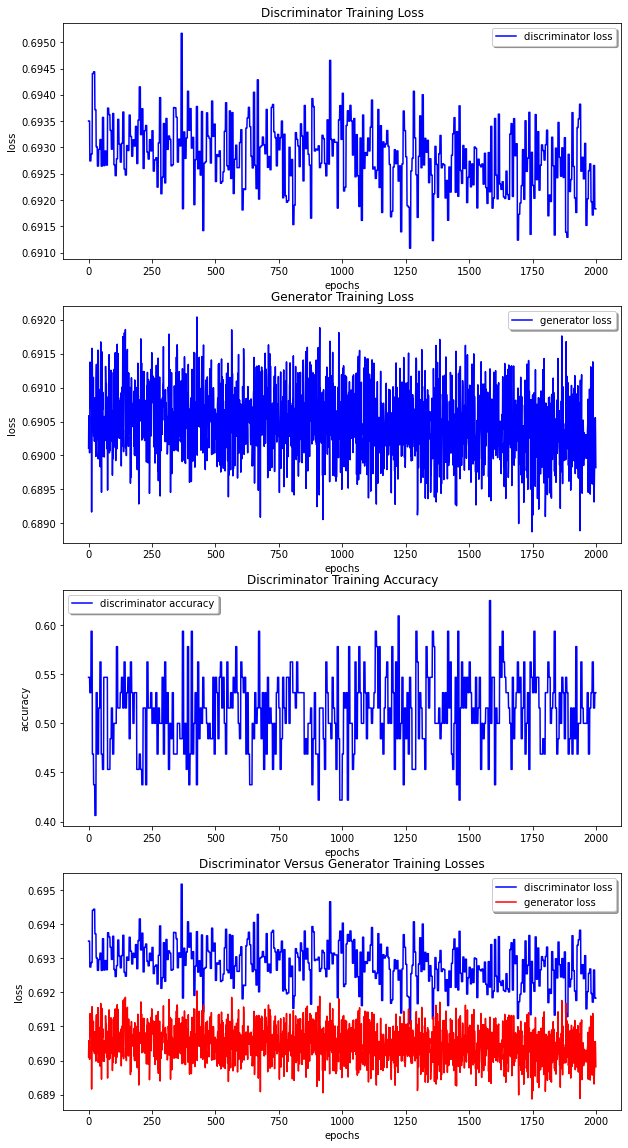

In [ ]:
plot_acc_loss_history(ger_cred_history)


#Performances Analysis

Imports

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter

Analysis

In [ ]:
def analize(model, categorical_column_dict, binary_column_dict):
  generated_samples = model.generate_samples(100, categorical_column_dict=categorical_column_dict, binary_column_dict=binary_column_dict)
  # print(generated_samples)
  y_true = np.zeros((100, 1)) #labels for the generated data samples

  y_hat = model.discriminate(generated_samples)
  # generated_samples = generated_samples[:, : -1]
  # print(generated_samples.shape)
  # generated_samples = np.concatenate((generated_samples, y_hat),axis=1)
  # print(generated_samples.shape)
  # print(np.hstack(y_hat))
  y_hat_class = [0 if x<0.5 else 1 for x in y_hat]
  print("Confusion Matrix")
  print(confusion_matrix(y_true, y_hat_class))
  counter = Counter()
  counter.update(y_hat_class)
  print(counter)
  print(f"The number of samples that were able to pass as real samples: {np.sum(y_hat_class)}")
  return generated_samples, y_hat_class


Samples Averages

In [ ]:
def get_representative_samples(dataframe, categorical_column_dict, binary_column_dict):
  rep_samples = pd.DataFrame()
  for class_id in dataframe["class"].unique():
    classes_samples = dataframe[dataframe['class'] == class_id]
    classes_samples_mean = classes_samples.mean()
    # print(classes_samples_mean)
    classes_samples_mode = classes_samples.mode(axis=0).head(1)
    # print(classes_samples_mode)

    rep_sample_details = {}
    for column_name in dataframe.columns:
      if categorical_column_dict and column_name in categorical_column_dict or column_name in binary_column_dict:
        rep_sample_details[column_name] = str(classes_samples_mode[column_name].to_list()[0])
      else:
        rep_sample_details[column_name] = classes_samples_mean[column_name] 
    rep_samples = rep_samples.append(rep_sample_details, ignore_index=True)

  return rep_samples

def cosine_similarity(u, v):
  """
  Cosine similarity reflects the degree of similarity between u and v
  Arguments:
      u -- a vector of shape (n,)          
      v -- a vector of shape (n,)

  Returns:
      cosine_similarity -- the cosine similarity between u and v.
  """
  # Compute the dot product between u and v 
  dot = np.dot(u,v)
  # Compute the L2 norm of u
  norm_u = np.linalg.norm(u) 
  # Compute the L2 norm of v 
  norm_v = np.linalg.norm(v) 
  # Compute the cosine similarity
  cosine_similarity = dot / (norm_u * norm_v)
  
  return cosine_similarity

In [ ]:
diabetes_rep_samples = get_representative_samples(normalized_diabetes_df, None , diabetes_binary_col_dict)
diabetes_rep_samples

,age,class,insu,mass,pedi,plas,preg,pres,skin
0,0.267786,1.0,0.118600,0.523734,0.201751,0.709836,0.286216,0.580530,0.223881
1,0.169833,0.0,0.081314,0.451627,0.150185,0.552663,0.194000,0.558885,0.198626


In [ ]:
ger_cred_rep_samples = get_representative_samples(normalized_ger_cred_df_no_dummies, ger_cred_cat_col_dict , ger_cred_binary_col_dict)
ger_cred_rep_samples

,1,10,11,12,13,14,15,16,17,18,19,2,20,3,4,5,6,7,8,9,class
0,b'A14',b'A101',0.614286,b'A123',0.307577,b'A143',b'A152',0.141429,b'A173',0.155714,b'A191',0.223634,b'A201',b'A32',b'A43',0.150515,b'A61',b'A73',0.640000,b'A93',0.0
1,b'A11',b'A101',0.616667,b'A123',0.267202,b'A143',b'A152',0.122222,b'A173',0.153333,b'A191',0.306765,b'A201',b'A32',b'A40',0.202934,b'A61',b'A73',0.698889,b'A93',1.0


In [ ]:
ger_cred_rep_samples.rename(columns={'class': '21'}, inplace=True)
ger_cred_rep_samples.loc[0]
for col in ger_cred_cat_col_dict:
  ger_cred_rep_samples[col] = [x[2:-1] for x in ger_cred_rep_samples[col]]
  ger_cred_rep_samples[col] = ger_cred_rep_samples[col].astype('bytes')
  print(ger_cred_rep_samples[col])


0    b'A14'
1    b'A11'
Name: 1, dtype: bytes24
0    b'A32'
1    b'A32'
Name: 3, dtype: bytes24
0    b'A43'
1    b'A40'
Name: 4, dtype: bytes24
0    b'A61'
1    b'A61'
Name: 6, dtype: bytes24
0    b'A73'
1    b'A73'
Name: 7, dtype: bytes24
0    b'A93'
1    b'A93'
Name: 9, dtype: bytes24
0    b'A101'
1    b'A101'
Name: 10, dtype: bytes32
0    b'A123'
1    b'A123'
Name: 12, dtype: bytes32
0    b'A143'
1    b'A143'
Name: 14, dtype: bytes32
0    b'A152'
1    b'A152'
Name: 15, dtype: bytes32
0    b'A173'
1    b'A173'
Name: 17, dtype: bytes32
0    b'A191'
1    b'A191'
Name: 19, dtype: bytes32
0    b'A201'
1    b'A201'
Name: 20, dtype: bytes32


In [ ]:
concated = pd.concat((ger_cred_df,ger_cred_rep_samples), axis=0)
concated['14'].unique()

array([b'A143', b'A141', b'A142'], dtype=object)

In [ ]:
normalized_ger_cred_rep_samples = normalize_ger_cred(concated)
normalized_ger_cred_rep_samples

,2,5,8,11,13,16,18,b'A11',b'A12',b'A13',b'A14',b'A30',b'A31',b'A32',b'A33',b'A34',b'A40',b'A41',b'A410',b'A42',b'A43',b'A44',b'A45',b'A46',b'A48',b'A49',b'A61',b'A62',b'A63',b'A64',b'A65',b'A71',b'A72',b'A73',b'A74',b'A75',b'A91',b'A92',b'A93',b'A94',b'A101',b'A102',b'A103',b'A121',b'A122',b'A123',b'A124',b'A141',b'A142',b'A143',b'A151',b'A152',b'A153',b'A171',b'A172',b'A173',b'A174',b'A191',b'A192',b'A201',b'A202',class
0,0.080477,0.063442,1.000000,1.000000,0.892952,0.484241,0.458484,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
1,0.665628,0.322997,0.404762,0.409283,0.290807,0.226361,0.458484,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1
2,0.164070,0.113757,0.404762,0.704641,0.652094,0.226361,1.000000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
3,0.582035,0.427807,0.404762,1.000000,0.598570,0.226361,1.000000,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0
4,0.331256,0.264323,0.702381,1.000000,0.705618,0.484241,1.000000,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.164070,0.043631,1.000000,1.000000,0.504903,0.226361,0.458484,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
998,0.623832,0.100134,1.000000,1.000000,0.304188,0.226361,0.458484,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1
999,0.623832,0.248366,0.702381,1.000000,0.357712,0.226361,0.458484,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
0,0.000000,0.000000,0.000000,0.000000,0.000540,0.004953,0.001289,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0.0


In [ ]:
normalized_ger_cred_rep_samples = normalized_ger_cred_rep_samples[-2:]
normalized_ger_cred_rep_samples

,2,5,8,11,13,16,18,b'A11',b'A12',b'A13',b'A14',b'A30',b'A31',b'A32',b'A33',b'A34',b'A40',b'A41',b'A410',b'A42',b'A43',b'A44',b'A45',b'A46',b'A48',b'A49',b'A61',b'A62',b'A63',b'A64',b'A65',b'A71',b'A72',b'A73',b'A74',b'A75',b'A91',b'A92',b'A93',b'A94',b'A101',b'A102',b'A103',b'A121',b'A122',b'A123',b'A124',b'A141',b'A142',b'A143',b'A151',b'A152',b'A153',b'A171',b'A172',b'A173',b'A174',b'A191',b'A192',b'A201',b'A202',class
0,0.000000,0.000000,0.000000,0.000000,0.00054,0.004953,0.001289,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0.0
1,0.001158,0.000003,0.017526,0.000703,0.00000,0.000000,0.000000,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1.0


##PCA

In [ ]:
def plot_scatter_pca_2D(df, color_count, hue="class", color_palate="Paired", title="PCA2D"):
    plt.figure(figsize=(16, 10))
    sns.scatterplot(
        x="pca_one", y="pca_two",
        hue=hue,
        palette=sns.color_palette(color_palate, color_count),
        data=df.loc[:],
        legend="full",
        alpha=0.95
    )
    plt.title(title)
    plt.show()


def plot_scatter_pca_3D(df, title="PCA3D"):
    print(set(df["class"]))
    ax = plt.figure(figsize=(16, 10)).gca(projection='3d')
    ax.scatter(
        xs=df["pca_one"],
        ys=df["pca_two"],
        zs=df["pca_three"],
        c=df["class"],
        label=df["class"],
        alpha=0.95,
        cmap='tab20'
    )
    ax.set_xlabel('pca_one')
    ax.set_ylabel('pca_two')
    ax.set_zlabel('pca_three')
    ax.legend(list(set(df["class"])))
    # plt.legend(df["class"],loc='best')
    plt.title(title)
    plt.show()

def PCA_analysis(data_df):
  pca = PCA(n_components=3)
  pca_result = pca.fit_transform(data_df[data_df.columns[:-1]].values)

  pca_df = pd.DataFrame()
  pca_df["class"] =  data_df["class"]

  pca_df['pca_one'] = pca_result[:, 0]
  pca_df['pca_two'] = pca_result[:, 1]
  pca_df['pca_three'] = pca_result[:, 2]
  return pca_df


##Diabetes

In [ ]:
diabetes_generated_samples, diabetes_y_hat = analize(diabetes_gan, None, diabetes_binary_col_dict)


Confusion Matrix
[[  0 100]
 [  0   0]]
Counter({1: 100})
The number of samples that were able to pass as real samples: 100


Similarity

In [ ]:
# diabetes_fake= []
# diabetes_real= []
# for index, disc_label in enumerate(diabetes_y_hat):
#   if disc_label == 0:
#     diabetes_fake.append(diabetes_generated_samples[index])
#   else:
#     diabetes_real.append(diabetes_generated_samples[index])

In [ ]:
# diabetes_fake_df = pd.DataFrame(diabetes_fake, columns=normalized_diabetes_df.columns).head(10).tail(2)
# diabetes_real_df = pd.DataFrame(diabetes_real, columns=normalized_diabetes_df.columns).head(2)
# diabetes_real_df

In [ ]:
# vec_rep = []
# vec_gen = []
# for col_name in diabetes_rep_samples.columns:
#   if col_name == "class":
#     print(f"rep class: {list(diabetes_rep_samples[col_name])}, gen_class: {list(diabetes_real_df[col_name])}")
#   vec_rep.append([float(x) for x in list(diabetes_rep_samples[col_name])])
#   vec_gen.append([float(x) for x in list(diabetes_real_df[col_name])])
# print(np.asarray(vec_rep).T.shape)
# print(np.asarray(vec_gen).T.shape)
# vec_rep = np.asarray(vec_rep).T
# vec_gen = np.asarray(vec_gen).T
# print(f"class 0 cos-sim: {cosine_similarity(vec_rep[1], vec_gen[0])}")
# print(f"class 1 cos-sim: {cosine_similarity(vec_rep[0], vec_gen[1])}")
# print(f"class 0 euclidean distance: {np.linalg.norm(vec_rep[1]-vec_gen[0])}")
# print(f"class 1 euclidean distance: {np.linalg.norm(vec_rep[0]-vec_gen[1])}")


In [ ]:
diabetes_joined_df = pd.DataFrame(diabetes_generated_samples, columns=normalized_diabetes_df.columns)
print(diabetes_joined_df["class"])

diabetes_joined_df.loc[diabetes_joined_df['class'] >= 0.5, 'class'] = 3
diabetes_joined_df.loc[diabetes_joined_df['class'] < 0.5, 'class'] = 2

diabetes_joined_df = pd.concat((normalized_diabetes_df,diabetes_joined_df),axis=0)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
95    1.0
96    1.0
97    1.0
98    1.0
99    1.0
Name: class, Length: 100, dtype: float32


In [ ]:
diabetes_joined_df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
95,0.465604,0.497579,0.518388,0.492380,0.473025,0.507757,0.547081,0.458035,3.0
96,0.496933,0.500051,0.501431,0.494289,0.501359,0.502153,0.506759,0.488662,3.0
97,0.466932,0.494097,0.510165,0.493753,0.474189,0.504310,0.542344,0.457444,3.0
98,0.501764,0.501346,0.498831,0.496062,0.504288,0.501335,0.500656,0.496627,3.0


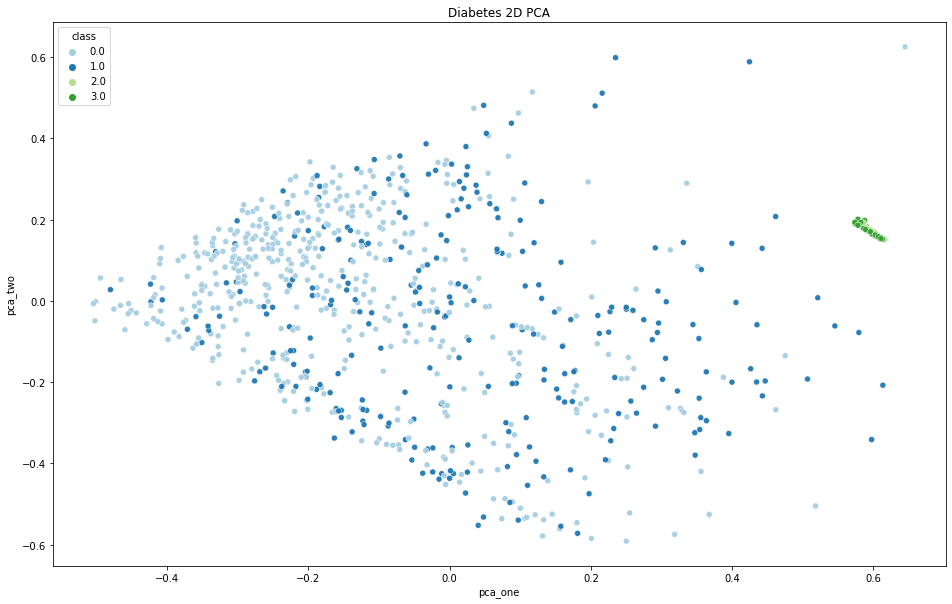

In [ ]:

diabetes_pca_df = PCA_analysis(diabetes_joined_df)

plot_scatter_pca_2D(df=diabetes_pca_df, color_count=len(diabetes_pca_df["class"].unique()), title="Diabetes 2D PCA")



[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0,

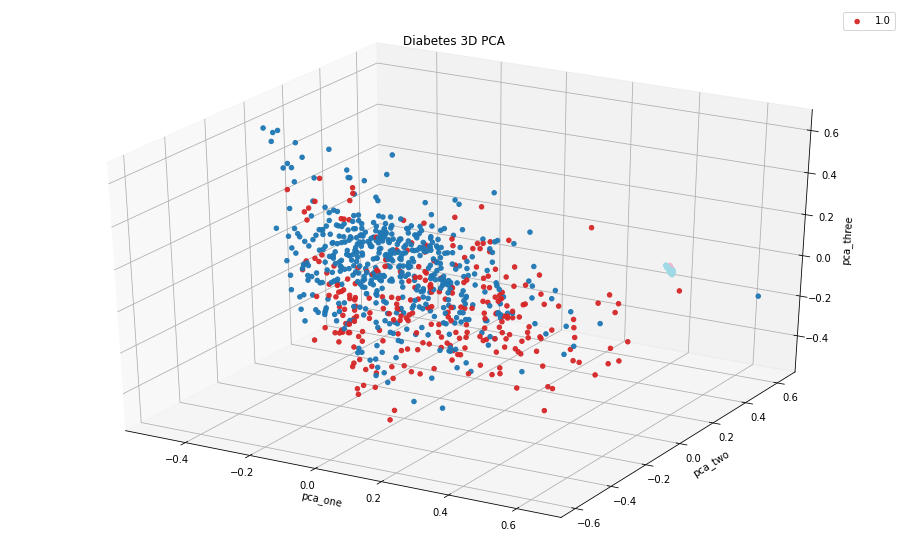

In [ ]:
plot_scatter_pca_3D(df=diabetes_pca_df, title="Diabetes 3D PCA")

##German_credit 

In [ ]:
ger_cred_generated_samples, ger_cred_y_hat = analize(ger_cred_gan,ger_cred_cat_col_dict,ger_cred_binary_col_dict)

Confusion Matrix
[[ 5 95]
 [ 0  0]]
Counter({1: 95, 0: 5})
The number of samples that were able to pass as real samples: 95


In [ ]:
print([index for index,x in enumerate(ger_cred_y_hat) if x == 0])

[1, 22, 37, 92, 94]


In [ ]:
ger_cred_joined_df = pd.DataFrame(ger_cred_generated_samples, columns=normalized_ger_cred_df.columns)
ger_cred_joined_df.loc[ger_cred_joined_df['class'] >= 0.5, 'class'] = 3
ger_cred_joined_df.loc[ger_cred_joined_df['class'] < 0.5, 'class'] = 2
ger_cred_gen_df = ger_cred_joined_df

ger_cred_joined_df = pd.concat((normalized_ger_cred_df,ger_cred_joined_df),axis=0)

In [ ]:
ger_cred_gen_df.loc[94]

2          0.384152
5          0.505486
8          0.607758
11         0.428232
13         0.329127
             ...   
b'A191'    0.000000
b'A192'    1.000000
b'A201'    1.000000
b'A202'    0.000000
class      2.000000
Name: 94, Length: 62, dtype: float32

In [ ]:
ger_cred_fooling_samples = ger_cred_gen_df[95:100:4]
ger_cred_not_fooling_samples = ger_cred_gen_df[1:100:100]
ger_cred_not_fooling_samples

,2,5,8,11,13,16,18,b'A11',b'A12',b'A13',b'A14',b'A30',b'A31',b'A32',b'A33',b'A34',b'A40',b'A41',b'A410',b'A42',b'A43',b'A44',b'A45',b'A46',b'A48',b'A49',b'A61',b'A62',b'A63',b'A64',b'A65',b'A71',b'A72',b'A73',b'A74',b'A75',b'A91',b'A92',b'A93',b'A94',b'A101',b'A102',b'A103',b'A121',b'A122',b'A123',b'A124',b'A141',b'A142',b'A143',b'A151',b'A152',b'A153',b'A171',b'A172',b'A173',b'A174',b'A191',b'A192',b'A201',b'A202',class
1,0.433941,0.715005,0.601305,0.375775,0.315064,0.52627,0.408812,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0


In [ ]:
vec_rep = []
vec_gen = []
for col_name in normalized_ger_cred_rep_samples.columns:
  if col_name == "class":
    print(f"rep class: {list(normalized_ger_cred_rep_samples[col_name])}, gen_class: {list(ger_cred_not_fooling_samples[col_name])}")
  vec_rep.append([float(x) for x in list(normalized_ger_cred_rep_samples[col_name])])
  vec_gen.append([float(x) for x in list(ger_cred_not_fooling_samples[col_name])])
print(np.asarray(vec_rep).T.shape)
print(np.asarray(vec_gen).T.shape)
vec_rep = np.asarray(vec_rep).T
vec_gen = np.asarray(vec_gen).T
print(f"class 0 cos-sim: {cosine_similarity(vec_rep[0], vec_gen[0])}")
# print(f"class 1 cos-sim: {cosine_similarity(vec_rep[1], vec_gen[0])}")
print(f"class 0 euclidean distance: {np.linalg.norm(vec_rep[0]-vec_gen[0])}")
# print(f"class 1 euclidean distance: {np.linalg.norm(vec_rep[1]-vec_gen[0])}")

rep class: ['0.0', '1.0'], gen_class: [2.0]
(2, 62)
(1, 62)
class 0 cos-sim: 0.38456325544969516
class 0 euclidean distance: 4.442868836867609


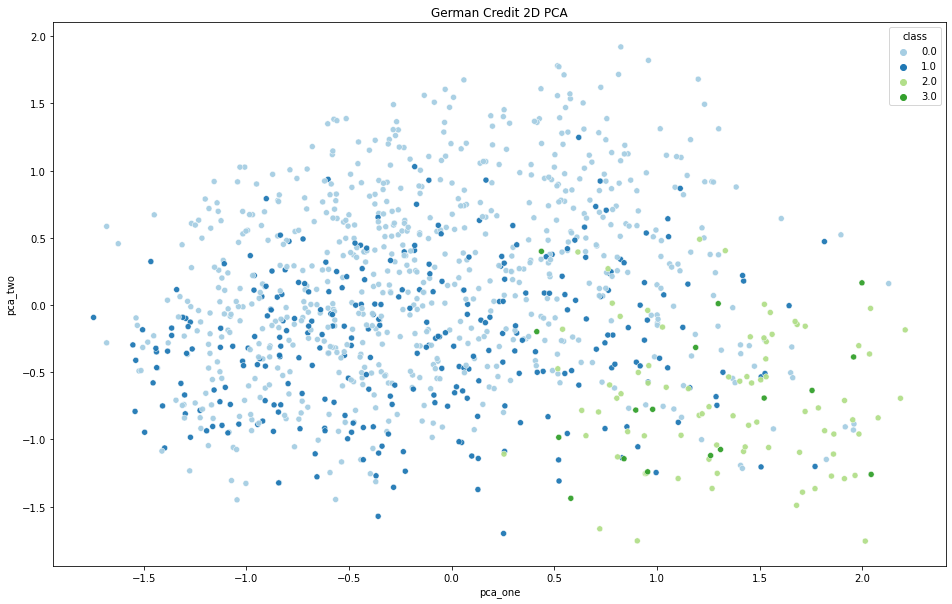

In [ ]:
ger_cred_pca_df = PCA_analysis(ger_cred_joined_df)
plot_scatter_pca_2D(df=ger_cred_pca_df, color_count=len(ger_cred_joined_df["class"].unique()), title="German Credit 2D PCA")



{0.0, 1.0, 2.0, 3.0}


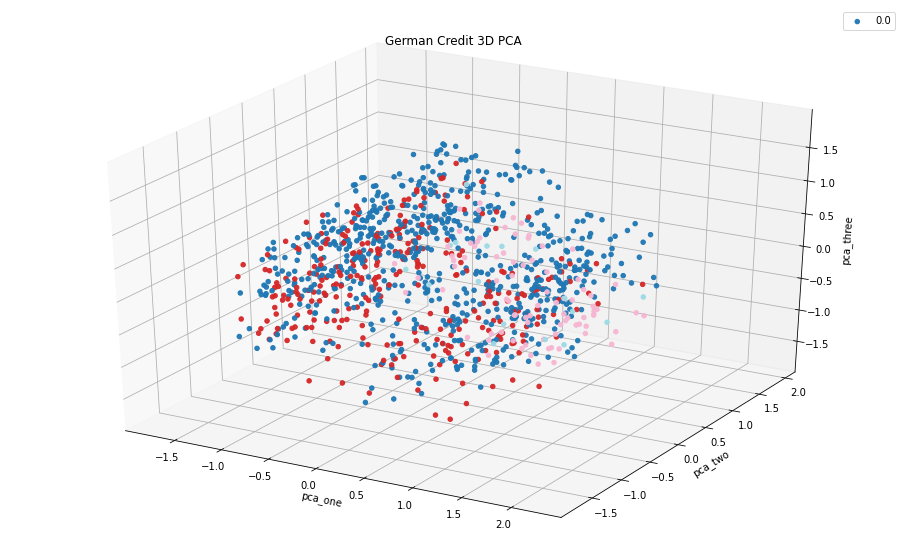

In [ ]:
plot_scatter_pca_3D(df=ger_cred_pca_df, title="German Credit 3D PCA")